# Experiment with the dvd rental database

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run connection.ipynb

Connecting with connection string : postgresql://postgres:letmein@db:5432/dvdrental
 * postgresql://postgres:***@db:5432/dvdrental
1 rows affected.
 * postgresql://postgres:***@db:5432/dvdrental
1 rows affected.
 * postgresql://postgres:***@db:5432/dvdrental
15 rows affected.


### How many films rent by each ratings?

In [3]:
%%sql rent_by_ratings_df <<

SELECT
    r.customer_id,
    ARRAY_AGG(film.rating)::text[] AS rent_by_ratings

FROM rental r
    INNER JOIN (
        SELECT i.film_id, i.inventory_id FROM inventory i
    ) AS inventory ON inventory.inventory_id = r.inventory_id

    INNER JOIN (
        SELECT f.film_id, f.title, f.rating FROM film f
    ) AS film ON film.film_id = inventory.inventory_id

GROUP BY 1
ORDER BY 1

 * postgresql://postgres:***@db:5432/dvdrental
597 rows affected.
Returning data to local variable rent_by_ratings_df


In [4]:
rent_by_ratings_df

,customer_id,rent_by_ratings
0,1,"[PG-13, PG-13, R, NC-17, R, PG-13, R]"
1,2,"[PG-13, G, R, NC-17, G, NC-17, G]"
2,3,"[R, PG-13, PG, R, R]"
3,4,"[G, NC-17, PG, PG, G, PG-13, G]"
4,5,"[NC-17, NC-17, PG, NC-17, PG-13, G, R, R, G, R]"
...,...,...
592,595,"[G, G, NC-17, NC-17, NC-17, NC-17]"
593,596,"[R, PG-13, R, G, PG, PG]"
594,597,"[NC-17, PG, PG-13, PG, PG-13]"
595,598,"[R, PG, R, NC-17]"


In [5]:
def to_frequency_table(data):
    frequencytable = {}
    for key in data:
        if key in frequencytable:
            frequencytable[key] += 1
        else:
            frequencytable[key] = 1
    return frequencytable

In [6]:
rent_by_ratings_df['rent_by_ratings'] = rent_by_ratings_df['rent_by_ratings'].apply(to_frequency_table)

In [7]:
ratings_df = pd.DataFrame(rent_by_ratings_df['rent_by_ratings'].apply(pd.Series))

In [8]:
ratings_df.fillna(0).astype('int')

,PG-13,R,NC-17,G,PG
0,3,3,1,0,0
1,1,1,2,3,0
2,1,3,0,0,1
3,1,0,1,3,2
4,1,3,3,2,1
...,...,...,...,...,...
592,0,0,4,2,0
593,1,2,0,1,2
594,2,0,1,0,2
595,0,2,1,0,1


In [9]:
transposed_df = ratings_df.transpose().fillna(0).astype('int')

In [10]:
transposed_df['Total'] = transposed_df.iloc[:, 1:-1].sum(axis=1)

In [11]:
transposed_df['Total']

PG-13    776
R        671
NC-17    711
G        622
PG       683
Name: Total, dtype: int64

Text(0.5, 1.0, 'Number of film rent by ratings')

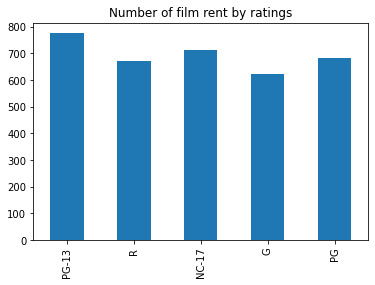

In [12]:
fig, ax = plt.subplots()
transposed_df['Total'].plot(kind='bar', ax=ax)
plt.title('Number of film rent by ratings')